In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gold_df = pd.read_csv('Desktop/Microsoft Office/Individual projects/CSV DATABASES/Metal Production/production-of-gold-mine.csv')

In [2]:
gold_df.columns

Index(['Country', 'Year', 'Production'], dtype='object')

In [3]:
gold_df['Country'].unique()

array(['Argentina', 'Australia', 'Bolivia', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Canada', 'Central African Republic',
       'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Gabon', 'German Democratic Rep',
       'German Federal Republic', 'Ghana', 'Guyana', 'Honduras', 'India',
       'Indonesia', 'Iran', 'Japan', 'Kenya', 'Korea (Rep. of)', 'Korea',
       'Liberia', 'Mali', 'Mauritania', 'Mexico', 'Mozambique', 'Myanmar',
       'Namibia', 'New Zealand', 'Nicaragua', 'Oman', 'Papua New Guinea',
       'Peru', 'Philippines', 'Portugal', 'Romania', 'Saudi Arabia',
       'Sierra Leone', 'Solomon Islands', 'South Africa', 'Soviet Union',
       'Spain', 'Sudan', 'Sweden', 'Taiwan', 'Tanzania', 'USA',
       'Venezuela', 'Yugoslavia', 'Zaire', 'Zambia', 'Zimbabwe',
       'Armenia', 'Brazil', 'Bulgaria', 'Czech Republic', 'Eritrea',
       'France (French Guiana)', 'Georgi

In [4]:
# Load and clean the data

gold_df_clean = gold_df.copy()
gold_df_clean['Country'] = gold_df_clean['Country'].replace('', np.nan)
gold_df_clean['Country'].ffill()
gold_df_clean['Year'] = pd.to_numeric(gold_df_clean['Year'], errors='coerce')
gold_df_clean['Production'] = pd.to_numeric(gold_df_clean['Production'], errors='coerce')
gold_df_clean.dropna(subset=['Year', 'Production'], inplace=True)
gold_df_clean.reset_index(drop=True, inplace=True)

# First, let's get a list of all unique countries to build our mapping
unique_countries = gold_df_clean['Country'].unique()
print("Number of unique countries:", len(unique_countries))
print("Sample of countries:", unique_countries[:20])

Number of unique countries: 123
Sample of countries: ['Argentina' 'Australia' 'Bolivia' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Canada' 'Central African Republic' 'Chile' 'China' 'Colombia'
 'Congo' 'Costa Rica' 'Dominican Republic' 'Ecuador' 'Ethiopia' 'Fiji'
 'Finland' 'France']


In [5]:
# Creating continent column based on the country column
# Define a mapping of country to continent
# Note: This handles historical names (e.g., USSR, Yugoslavia) by mapping them to their modern geographic continent.
country_to_continent = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa', 'Central African Republic': 'Africa',
    'Chad': 'Africa', 'Congo': 'Africa', 'Egypt': 'Africa', 'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa', 'Eswatini (Swaziland)': 'Africa', 'Ethiopia': 'Africa', 'Gabon': 'Africa',
    'Ghana': 'Africa', 'Guinea': 'Africa', 'Ivory Coast': 'Africa', 'Kenya': 'Africa',
    'Liberia': 'Africa', 'Madagascar': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Senegal': 'Africa', 'Sierra Leone': 'Africa',
    'South Africa': 'Africa', 'Sudan': 'Africa', 'Tanzania': 'Africa', 'Togo': 'Africa',
    'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa', 'Zaire': 'Africa', # Zaire (now DRC)
    'Rhodesia': 'Africa', # Historical name for Zimbabwe
    'Côte d\'Ivoire': 'Africa', # Alternative spelling for Ivory Coast

    # Asia
    'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'China': 'Asia', 'India': 'Asia',
    'Indonesia': 'Asia', 'Iran': 'Asia', 'Japan': 'Asia', 'Kazakhstan': 'Asia',
    'Korea (Rep. of)': 'Asia', 'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Malaysia': 'Asia',
    'Myanmar': 'Asia', 'Oman': 'Asia', 'Philippines': 'Asia', 'Saudi Arabia': 'Asia',
    'Taiwan': 'Asia', 'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Turkey': 'Asia', # Turkey is transcontinental, but most gold production is in Asian part
    'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 'Cambodia': 'Asia', 'North Macedonia': 'Asia',
    'Yemen': 'Asia', 'Georgia': 'Asia', 'Sri Lanka': 'Asia',
    'Soviet Union': 'Asia', # Majority of territory in Asia

    # Europe
    'Bulgaria': 'Europe', 'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe',
    'Greece': 'Europe', 'Hungary': 'Europe', 'Italy': 'Europe', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe', # Russia is transcontinental, but most population/industry in Europe
    'Serbia': 'Europe', 'Slovakia': 'Europe', 'Spain': 'Europe', 'Sweden': 'Europe',
    'United Kingdom': 'Europe', 'Yugoslavia': 'Europe', 'Czech Republic': 'Europe',
    'French Guiana': 'Europe', # Overseas department of France
    'German Democratic Rep': 'Europe', 'German Federal Republic': 'Europe',

    # North America
    'Canada': 'North America', 'Costa Rica': 'North America', 'Dominican Republic': 'North America',
    'El Salvador': 'North America', 'Guatemala': 'North America', 'Honduras': 'North America',
    'Mexico': 'North America', 'Nicaragua': 'North America', 'Panama': 'North America',
    'USA': 'North America', 'United States': 'North America', 'Jamaica': 'North America',
    'Cuba': 'North America', 'Haiti': 'North America',

    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Guyana': 'South America', 'Peru': 'South America', 'Suriname': 'South America',
    'Uruguay': 'South America', 'Venezuela': 'South America', 'Paraguay': 'South America',

    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'New Zealand': 'Oceania',
    'Papua New Guinea': 'Oceania', 'Solomon Islands': 'Oceania', 'Greenland': 'Oceania' # Geographically North America, but often grouped with Oceania for mining analysis
}

# Add the continent column using the mapping
gold_df_clean['Continent'] = gold_df_clean['Country'].map(country_to_continent)

# Check for any countries that didn't get mapped (should be None if our mapping is complete)
unmapped_countries = gold_df_clean[gold_df_clean['Continent'].isnull()]['Country'].unique()
print("Unmapped countries (if any):", unmapped_countries)

# Display the enhanced dataframe
print("\nDataFrame with Continent column:")
print(gold_df_clean.head(10))

Unmapped countries (if any): ['France (French Guiana)' 'Mongolia' 'Serbia and Montenegro' 'South Sudan'
 'Cyprus' 'Ukraine']

DataFrame with Continent column:
     Country    Year  Production      Continent
0  Argentina  1983.0       767.0  South America
1  Argentina  1987.0       982.0  South America
2  Argentina  1989.0      1150.0  South America
3  Argentina  1990.0      1399.0  South America
4  Australia  1981.0     18374.0        Oceania
5  Australia  1988.0    156950.0        Oceania
6  Australia  1989.0    203563.0        Oceania
7  Australia  1990.0    242420.0        Oceania
8  Australia  1991.0    235990.0        Oceania
9    Bolivia  1984.0      1270.0  South America


In [6]:
# Update the country_to_continent mapping with the missing countries
additional_mappings = {
    # These were missing from the original mapping
    'France (French Guiana)': 'South America',  # French Guiana is in South America
    'Mongolia': 'Asia',
    'Serbia and Montenegro': 'Europe',  # Historical Balkan countries
    'South Sudan': 'Africa',  # Became independent from Sudan in 2011
    'Cyprus': 'Asia',  # Geographically in Asia, though culturally linked to Europe
    'Ukraine': 'Europe',
    
    # Adding a few more that might appear
    'North Korea': 'Asia',
    'South Korea': 'Asia',
    'DR Congo': 'Africa',  # Modern name for Zaire
    'Democratic Republic of the Congo': 'Africa',
}

# Add these to the original mapping
country_to_continent.update(additional_mappings)

# Now apply the mapping again
gold_df_clean['Continent'] = gold_df_clean['Country'].map(country_to_continent)

# Check again for any remaining unmapped countries
unmapped_countries = gold_df_clean[gold_df_clean['Continent'].isnull()]['Country'].unique()
print("Remaining unmapped countries (if any):", unmapped_countries)

# Show the count of records per continent to verify
print("\nRecords per continent:")
print(gold_df_clean['Continent'].value_counts())

Remaining unmapped countries (if any): []

Records per continent:
Continent
Africa           1375
Asia              921
South America     585
Europe            539
North America     437
Oceania           265
Name: count, dtype: int64


In [7]:
gold_df_clean = gold_df_clean[['Country','Continent','Year','Production']]

In [8]:
gold_df_clean

,Country,Continent,Year,Production
0,Argentina,South America,1983.0,767.0
1,Argentina,South America,1987.0,982.0
2,Argentina,South America,1989.0,1150.0
3,Argentina,South America,1990.0,1399.0
4,Australia,Oceania,1981.0,18374.0
...,...,...,...,...
4117,Cuba,North America,2002.0,1000.0
4118,Dominican Republic,North America,1992.0,2229.0
4119,Fiji,Oceania,1992.0,3693.0
4120,Fiji,Oceania,1994.0,3536.0


In [9]:
gold_df_clean['Year'].dtype

dtype('float64')

In [10]:
gold_df_clean['Year'] = gold_df_clean['Year'].astype(int)

In [11]:
gold_df_clean.dtypes

Country        object
Continent      object
Year            int32
Production    float64
dtype: object

In [12]:
gold_df_clean

,Country,Continent,Year,Production
0,Argentina,South America,1983,767.0
1,Argentina,South America,1987,982.0
2,Argentina,South America,1989,1150.0
3,Argentina,South America,1990,1399.0
4,Australia,Oceania,1981,18374.0
...,...,...,...,...
4117,Cuba,North America,2002,1000.0
4118,Dominican Republic,North America,1992,2229.0
4119,Fiji,Oceania,1992,3693.0
4120,Fiji,Oceania,1994,3536.0


In [13]:
#=========================================================================================

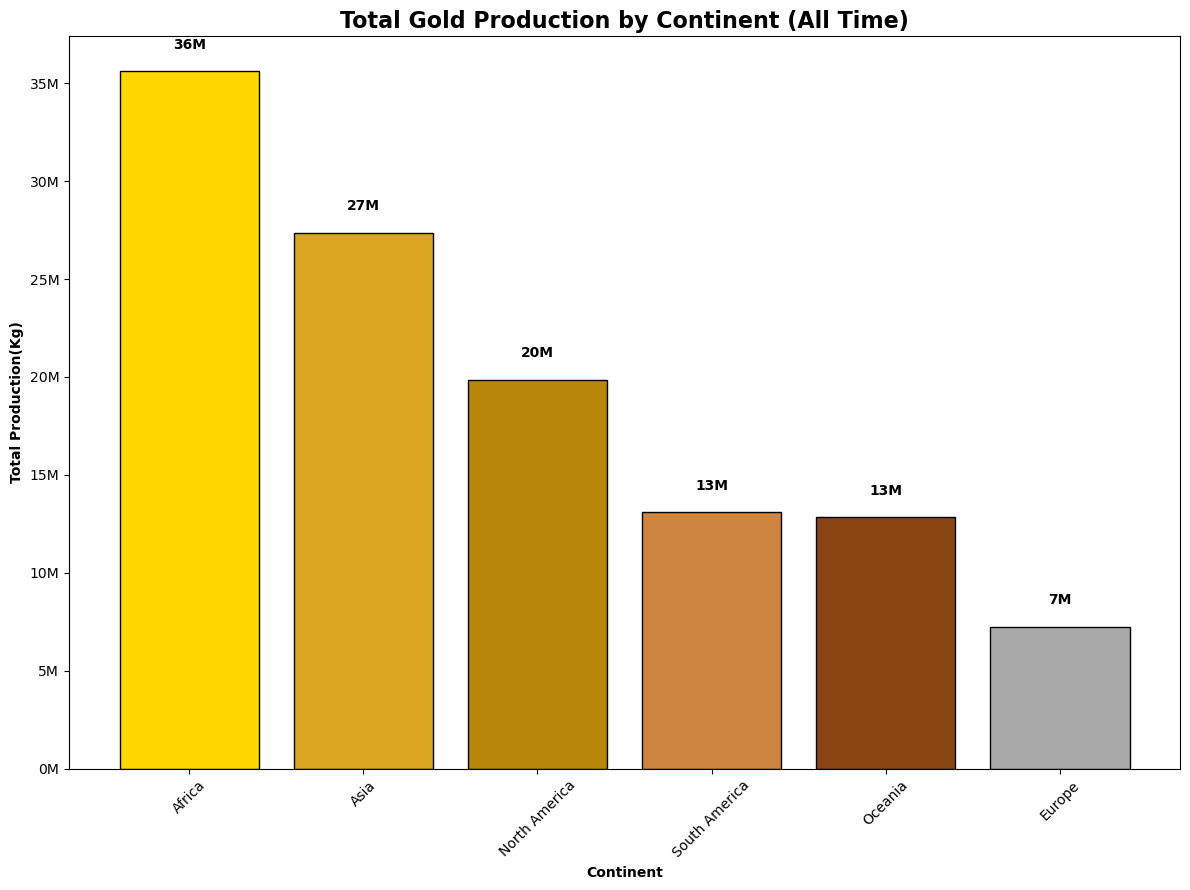

In [14]:
# Analysis Q1: Total Gold Production by Continent (All Time)

# Group by Continent and sum the production
continent_production = gold_df_clean.groupby('Continent')['Production'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 9))
colors = ['#FFD700', '#DAA520', '#B8860B', '#CD853F', '#8B4513', '#A9A9A9']
bars = plt.bar(continent_production.index, continent_production.values, color=colors, edgecolor='black')

plt.title('Total Gold Production by Continent (All Time)', fontsize=16, fontweight='bold')
plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Total Production(Kg)', fontweight='bold')
plt.xticks(rotation=45)

# Format y-axis to show millions for readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000000,
             f'{height/1e6:.0f}M', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

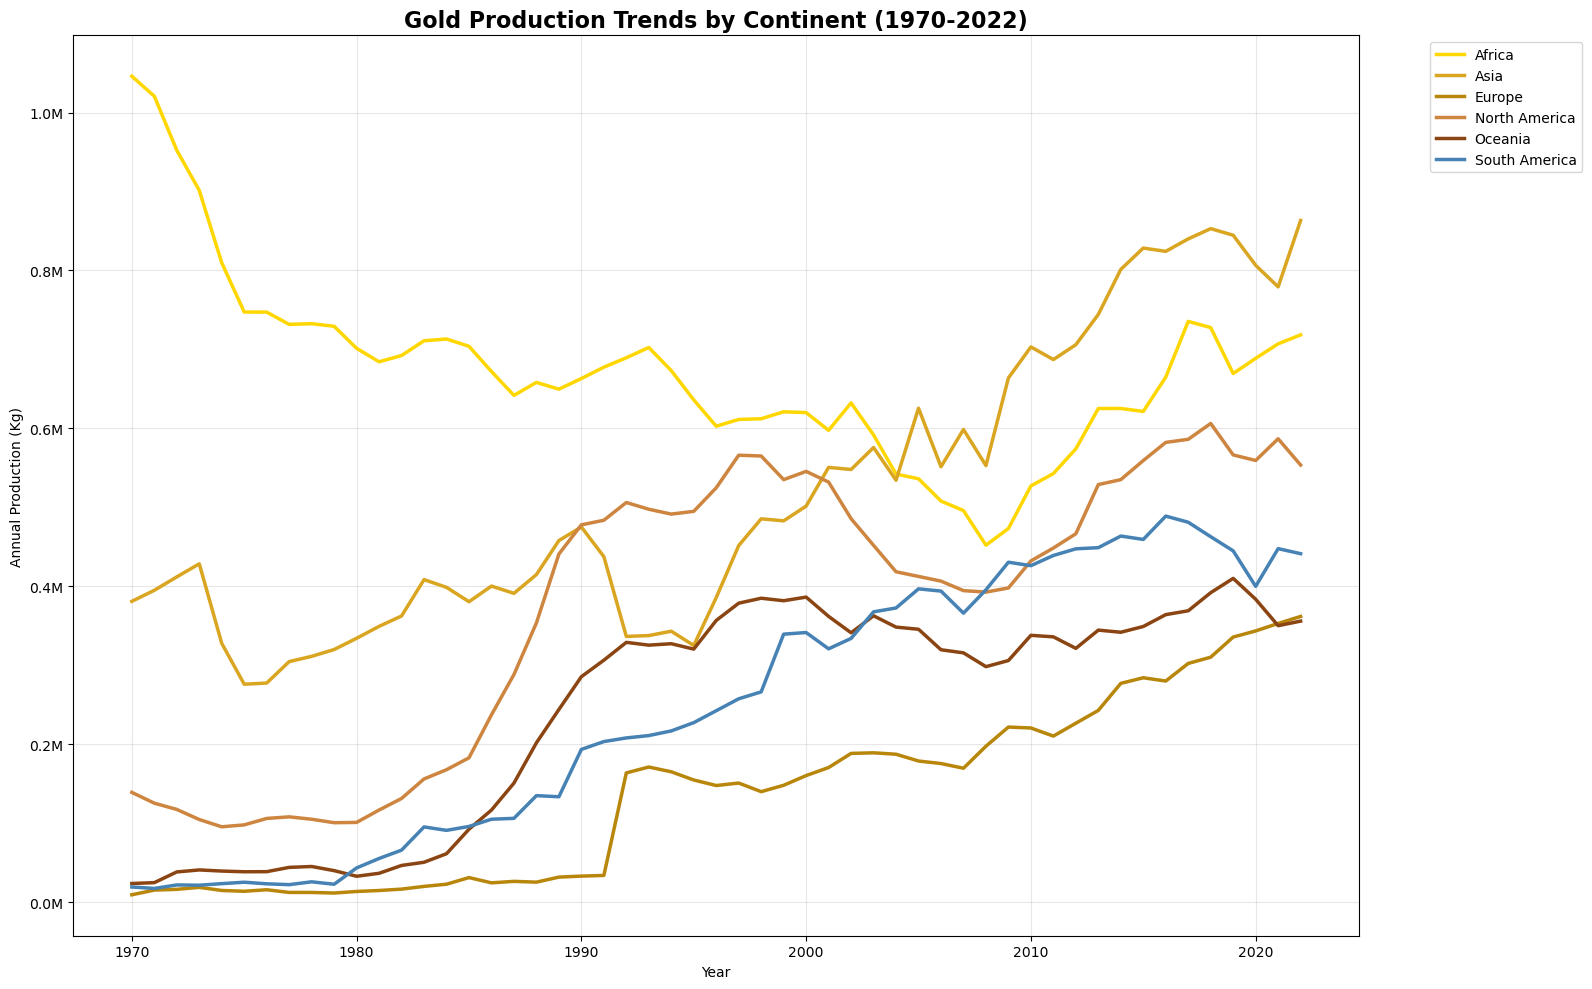

In [15]:
# Analysis Q2. Continental Production Trends Over Time (Line Chart)

# Group by Year and Continent
continent_yearly = gold_df_clean.groupby(['Year', 'Continent'])['Production'].sum().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
# Create a color palette for the continents
colors = ['#FFD700', '#DAA520', '#B8860B', '#CD853F', '#8B4513', '#4682B4']

for i, continent in enumerate(continent_yearly.columns):
    plt.plot(continent_yearly.index, continent_yearly[continent], 
             label=continent, linewidth=2.5, color=colors[i % len(colors)])

plt.title('Gold Production Trends by Continent (1970-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Annual Production (Kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.grid(True, alpha=0.3)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

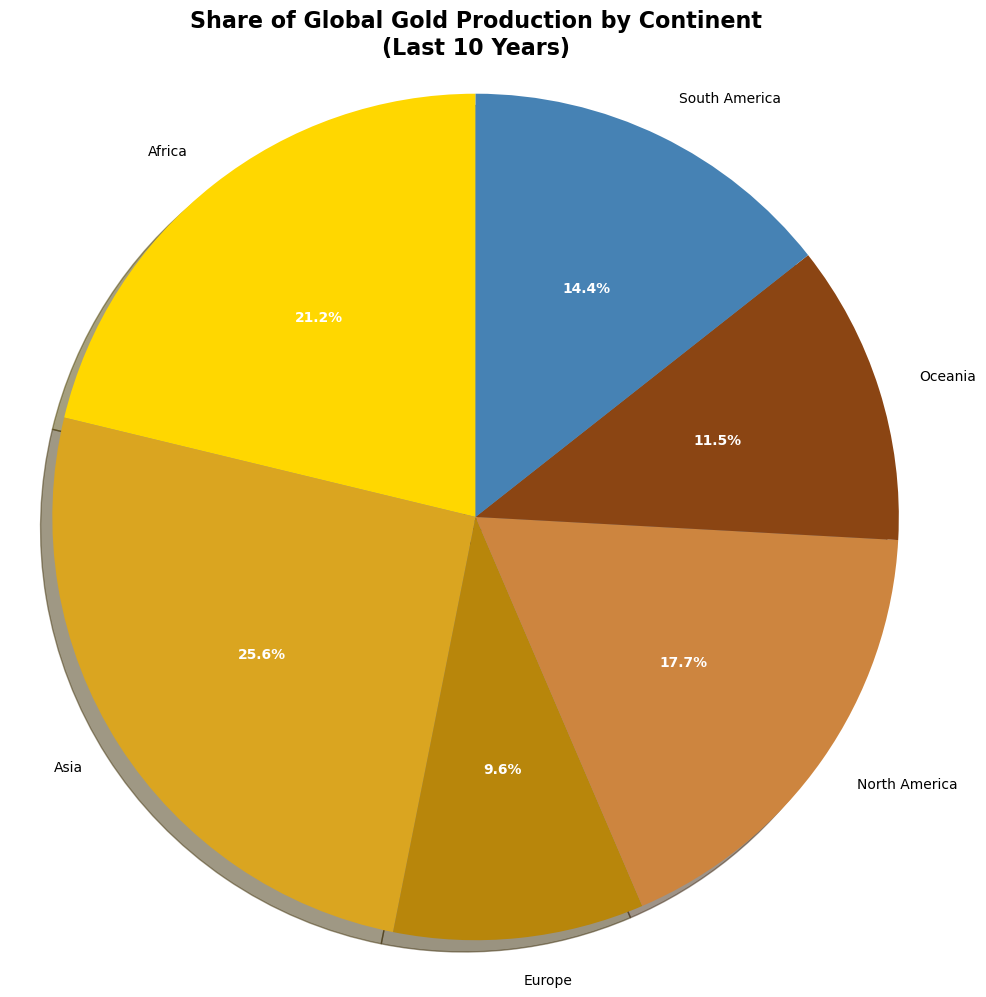

Production by Continent (Last Decade):
Continent
Asia             8.9M Kg
Africa           7.4M Kg
North America    6.1M Kg
South America    5.0M Kg
Oceania          4.0M Kg
Europe           3.3M Kg
Name: Production, dtype: object


In [16]:
# Analysis Q3:  Filter for the last decade
last_decade = gold_df_clean[gold_df_clean['Year'] >= (gold_df_clean['Year'].max() - 10)]
continent_decade = last_decade.groupby('Continent')['Production'].sum()

plt.figure(figsize=(10, 10))
colors = ['#FFD700', '#DAA520', '#B8860B', '#CD853F', '#8B4513', '#4682B4']
wedges, texts, autotexts = plt.pie(continent_decade.values, labels=continent_decade.index, colors=colors,
                                   autopct='%1.1f%%', startangle=90, shadow=True)

plt.title('Share of Global Gold Production by Continent\n(Last 10 Years)', fontsize=16, fontweight='bold')

# Make the percentages inside the pie chart white and bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.axis('equal')
plt.tight_layout()
plt.show()

# Also show the actual production numbers
print("Production by Continent (Last Decade):")
print(continent_decade.sort_values(ascending=False).apply(lambda x: f"{x/1e6:.1f}M Kg"))

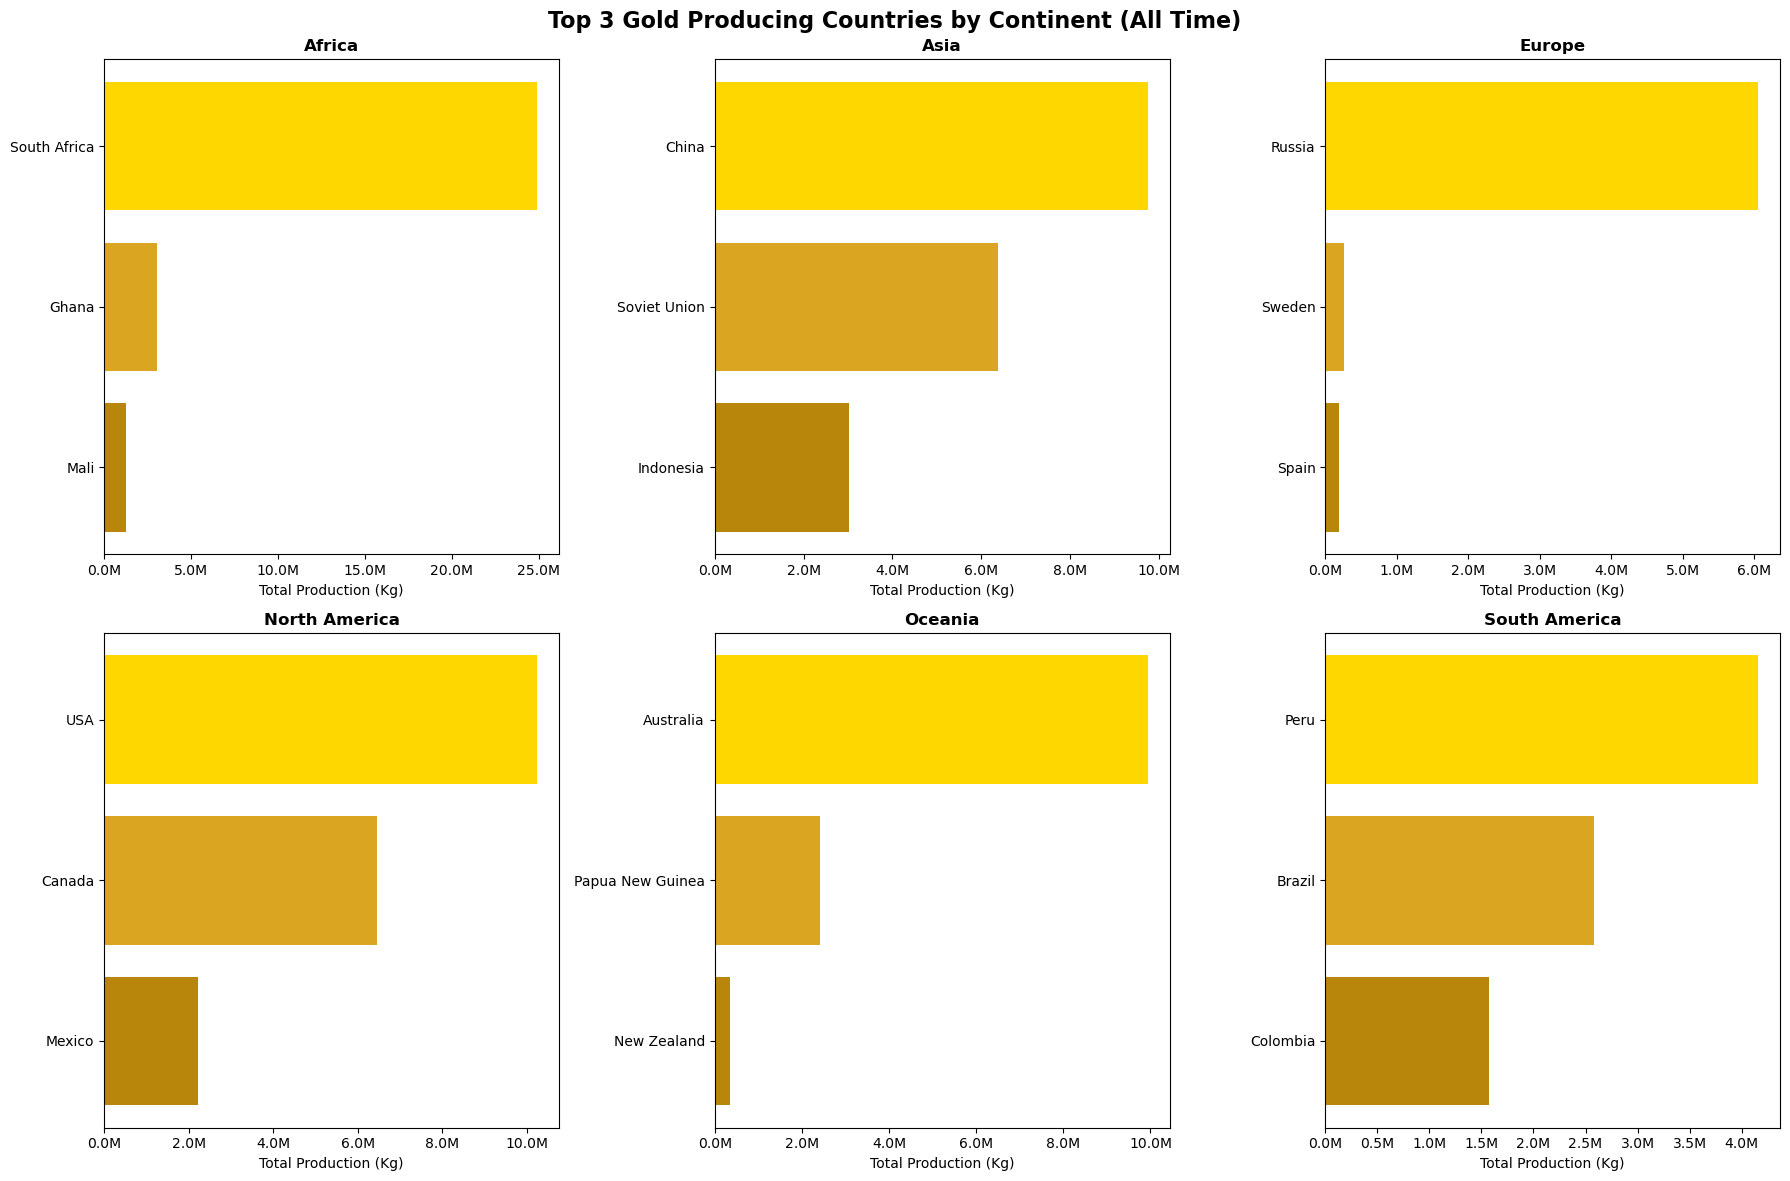

In [17]:
# Analysis Q4: Get top 3 producing countries in each continent
top_countries_by_continent = (gold_df_clean.groupby(['Continent', 'Country'])['Production']
                              .sum()
                              .groupby('Continent')
                              .nlargest(3)
                              .reset_index(level=0, drop=True) 
                              .reset_index()
                              .sort_values(['Continent', 'Production'], ascending=[True, False]))

# Create a subplot for each continent
continents = top_countries_by_continent['Continent'].unique()
n_continents = len(continents)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
axes = axes.flatten()

colors = ['#FFD700', '#DAA520', '#B8860B']

for i, continent in enumerate(continents):
    if i < len(axes):
        continent_data = top_countries_by_continent[top_countries_by_continent['Continent'] == continent]
        
        bars = axes[i].barh(continent_data['Country'], continent_data['Production'], color=colors)
        axes[i].set_title(f'{continent}', fontweight='bold')
        axes[i].set_xlabel('Total Production (Kg)')
        axes[i].invert_yaxis()  # Highest producer at top
        
        # Format x-axis to show millions (keeps it clean!)
        axes[i].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

plt.suptitle('Top 3 Gold Producing Countries by Continent (All Time)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

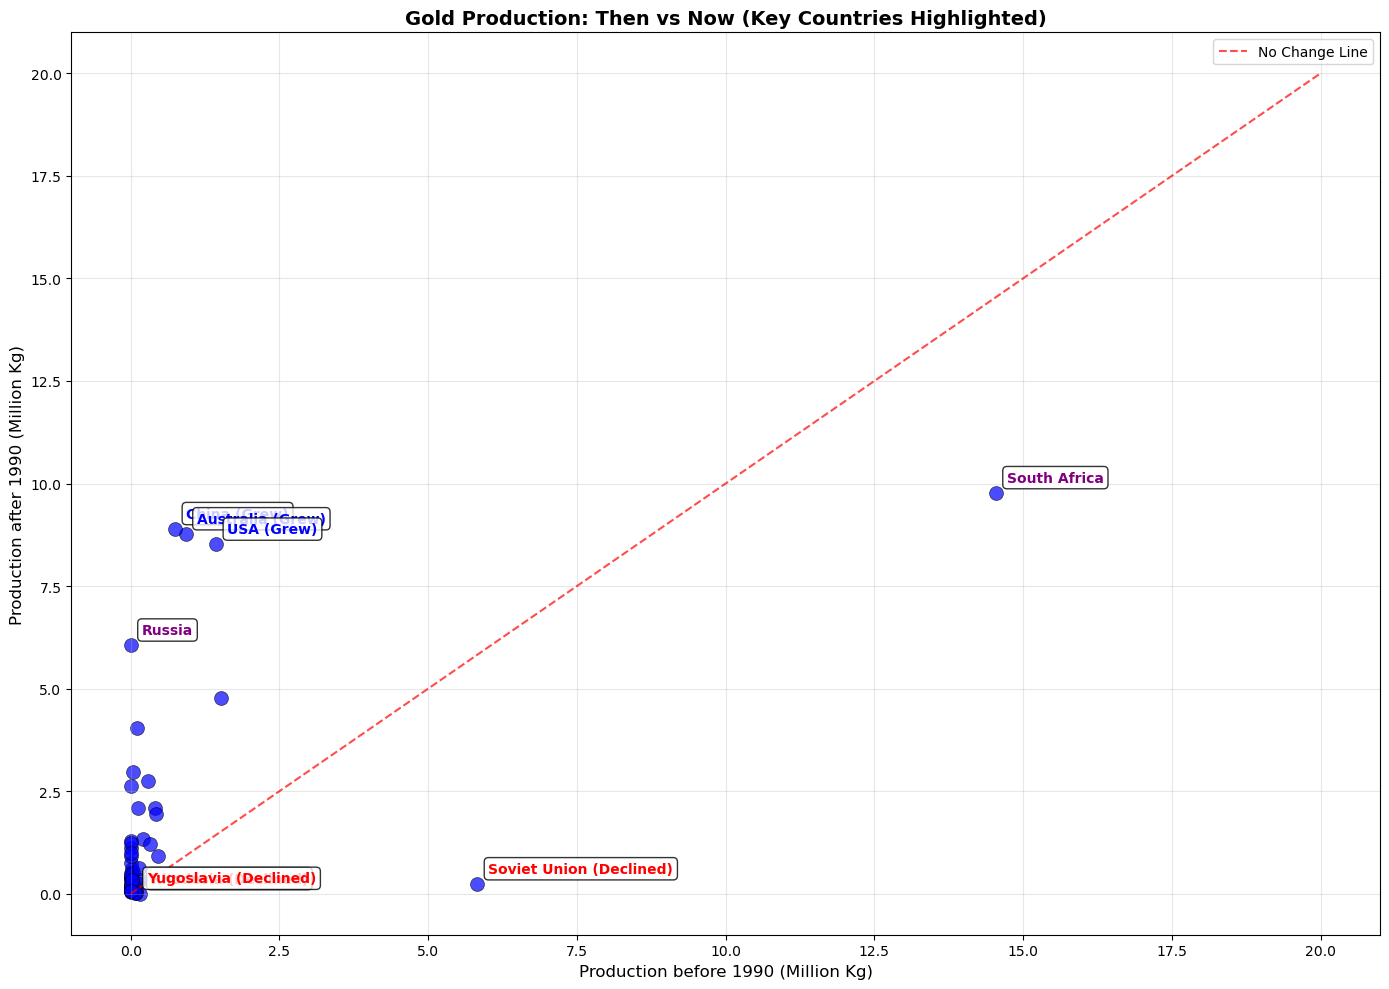

TOP PRODUCERS TODAY:
- South Africa
- China
- Australia
- USA
- Russia

MAJOR DECLINERS:
- Soviet Union
- Rhodesia
- Yugoslavia

MAJOR GROWERS:
- China
- Australia
- USA


In [18]:
# ANALYSIS Q5: Which countries have shown the most growth/decline in before and after 1990?

# Simple preparation - total production by country in both periods
early = gold_df_clean[gold_df_clean['Year'] < 1990].groupby('Country')['Production'].sum()
recent = gold_df_clean[gold_df_clean['Year'] > 1990].groupby('Country')['Production'].sum()

# Combine into a simple dataframe
simple_df = pd.DataFrame({'Early': early, 'Recent': recent}).fillna(0)

# Only show countries that produced meaningful amounts
meaningful = simple_df[(simple_df['Early'] > 50000) | (simple_df['Recent'] > 50000)]

# Create the scatter plot
plt.figure(figsize=(14, 10))
plt.scatter(meaningful['Early'] / 1e6, meaningful['Recent'] / 1e6, 
           alpha=0.7, s=100, color='blue', edgecolors='black', linewidth=0.5)

# Add labels and title
plt.xlabel('Production before 1990 (Million Kg)', fontsize=12)
plt.ylabel('Production after 1990 (Million Kg)', fontsize=12)
plt.title('Gold Production: Then vs Now (Key Countries Highlighted)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add the no-change line
max_val = max(meaningful[['Early', 'Recent']].max().max() / 1e6, 20)
plt.plot([0, max_val], [0, max_val], 'r--', label='No Change Line', alpha=0.7)

# IDENTIFY KEY COUNTRIES TO LABEL
# 1. Top producers recently (biggest bubbles in top area)
top_recent = meaningful.nlargest(5, 'Recent')

# 2. Major decliners (points far below the line)
declined = meaningful[meaningful['Recent'] < meaningful['Early'] * 0.5]  # Production halved
major_decliners = declined.nlargest(3, 'Early')  # Biggest historical producers that declined

# 3. Major growers (points far above the line)  
grew = meaningful[meaningful['Recent'] > meaningful['Early'] * 2]  # Production doubled
major_growers = grew.nlargest(3, 'Recent')  # Biggest recent producers that grew

# Combine all important countries to label
important_countries = pd.concat([top_recent, major_decliners, major_growers]).drop_duplicates()

# ADD LABELS ONLY FOR IMPORTANT COUNTRIES
for country in important_countries.index:
    x = important_countries.loc[country, 'Early'] / 1e6
    y = important_countries.loc[country, 'Recent'] / 1e6
    
    # PRIORITY: Decliners first, then growers, then current top producers
    if country in major_decliners.index:
        color = 'red'    # Major decliners (HIGHEST PRIORITY)
        label = f"{country} (Declined)"
    elif country in major_growers.index:
        color = 'blue'   # Major growers  
        label = f"{country} (Grew)"
    else:
        color = 'purple'  # Current top producers (but didn't grow/decline dramatically)
        label = country
    
    plt.annotate(label, (x, y), 
                 xytext=(8, 8), 
                 textcoords='offset points',
                 fontsize=10,
                 fontweight='bold',
                 color=color,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()

# Print summary
print("TOP PRODUCERS TODAY:")
for country in top_recent.index:
    print(f"- {country}")

print("\nMAJOR DECLINERS:")
for country in major_decliners.index:
    print(f"- {country}")

print("\nMAJOR GROWERS:")  
for country in major_growers.index:
    print(f"- {country}")


TOP 10 MOST CONSISTENT PRODUCERS:
(Steady, predictable production)
• Uzbekistan
• Soviet Union
• Philippines
• Russia
• Rhodesia
• Yugoslavia
• India
• Japan
• Canada
• Sweden

TOP 10 MOST VOLATILE PRODUCERS:
(Production jumps up and down a lot)
• Uganda
• Nigeria
• Niger
• Cameroon
• Mali
• Guinea
• Ivory Coast
• Solomon Islands
• Sudan
• Kenya


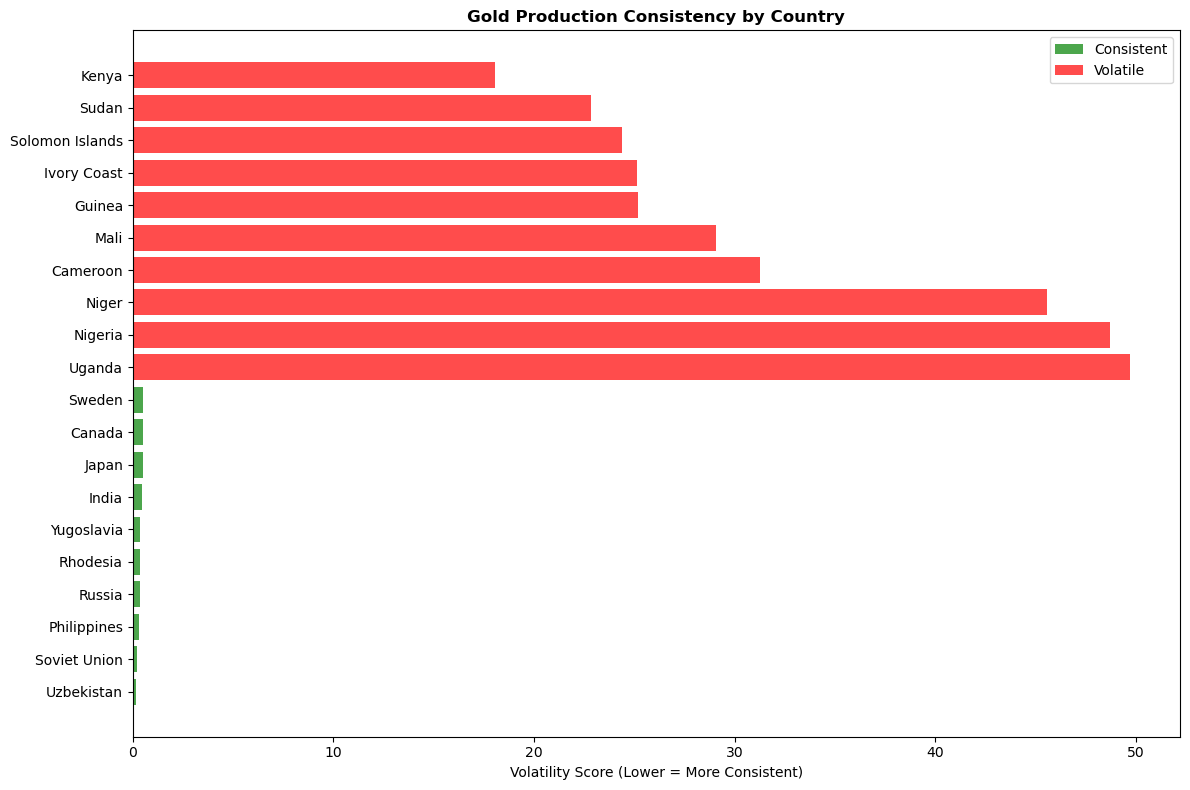

In [19]:
# Analysis Q6: Volatility of gold production by country:

# Step 1: Calculate how "jumpy" each country's production is
consistency_df = gold_df_clean.groupby('Country').agg({
    'Production': [
        ('Total_Production', 'sum'),
        ('Yearly_Change', lambda x: x.pct_change().std())  # How much it changes year-to-year
    ]
})

# Clean up the column names
consistency_df.columns = ['Total_Production', 'Yearly_Volatility']

# Remove infinite values and countries with little production
consistency_df = consistency_df[
    (consistency_df['Total_Production'] > 10000) & 
    (consistency_df['Yearly_Volatility'].notna())
]

# Step 2: Find most stable and most volatile producers
most_consistent = consistency_df.nsmallest(10, 'Yearly_Volatility')  # Smallest changes
most_volatile = consistency_df.nlargest(10, 'Yearly_Volatility')     # Biggest changes

print("TOP 10 MOST CONSISTENT PRODUCERS:")
print("(Steady, predictable production)")
for country in most_consistent.index:
    print(f"• {country}")

print("\nTOP 10 MOST VOLATILE PRODUCERS:")  
print("(Production jumps up and down a lot)")
for country in most_volatile.index:
    print(f"• {country}")

# Step 3: Simple visualization
plt.figure(figsize=(12, 8))

# Plot consistent producers
plt.barh(most_consistent.index, most_consistent['Yearly_Volatility'], 
         color='green', alpha=0.7, label='Consistent')
# Plot volatile producers
plt.barh(most_volatile.index, most_volatile['Yearly_Volatility'],
         color='red', alpha=0.7, label='Volatile')

plt.xlabel('Volatility Score (Lower = More Consistent)')
plt.title('Gold Production Consistency by Country', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

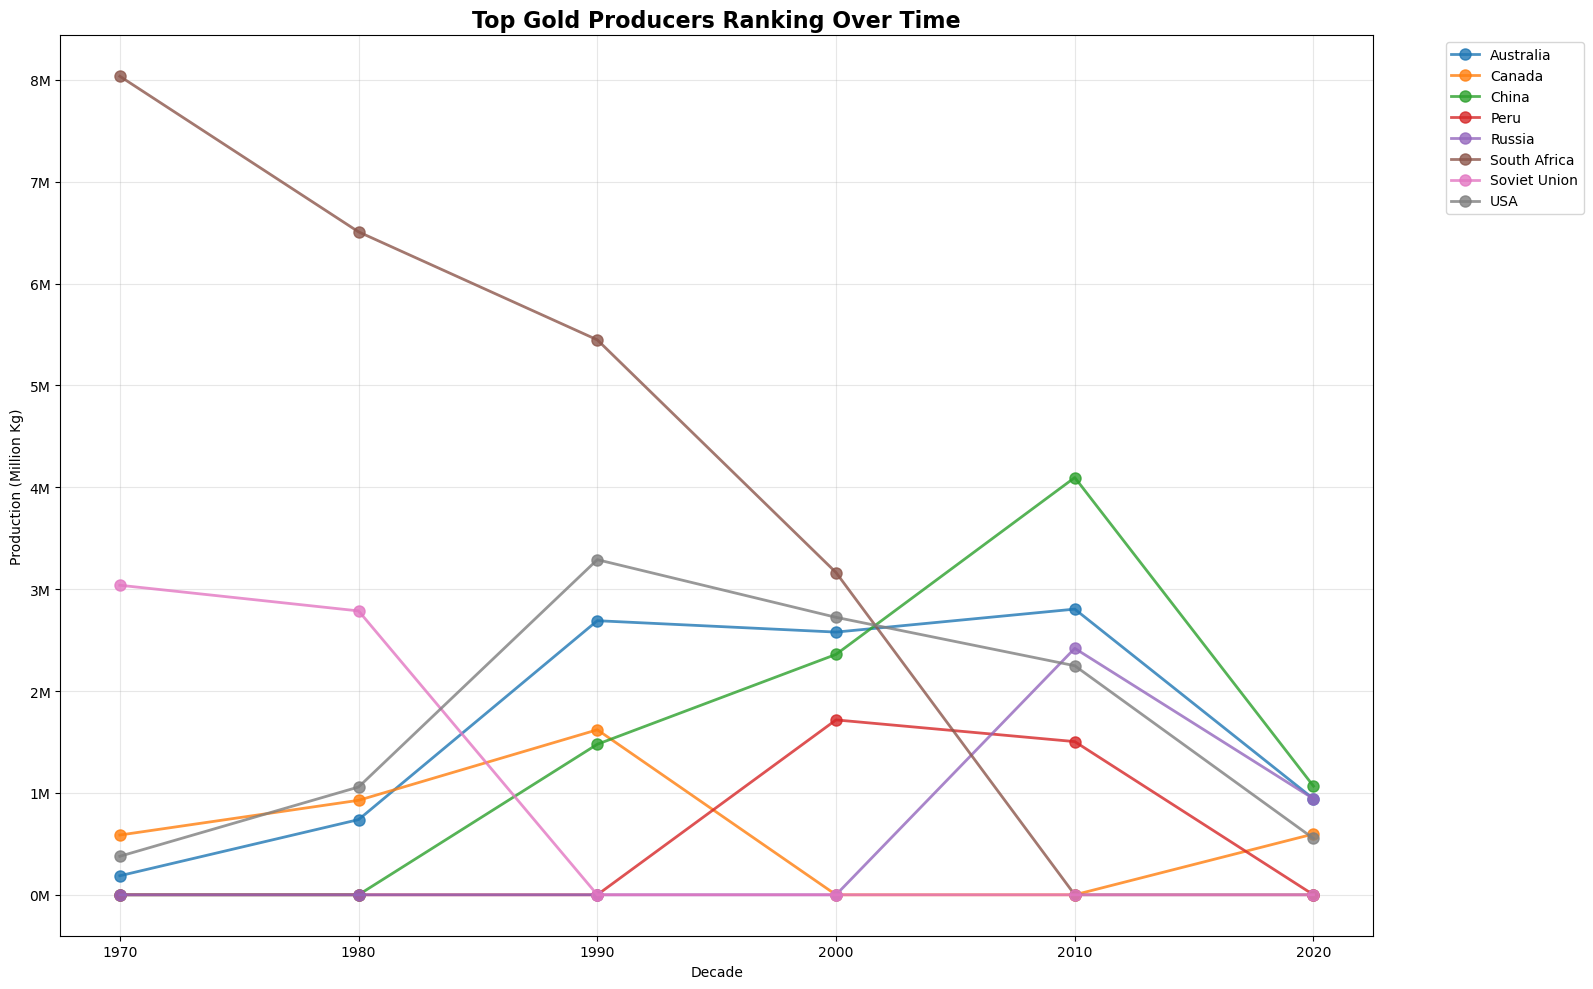

TOP PRODUCER IN EACH DECADE:
1970s: South Africa (8.0M kg)
1980s: South Africa (6.5M kg)
1990s: South Africa (5.4M kg)
2000s: South Africa (3.2M kg)
2010s: China (4.1M kg)
2020s: China (1.1M kg)


In [20]:
# Analysis Q7: Historical Leadership Analysis - "How has the ranking of top producers changed over time?"

# Create decade column for cleaner analysis
gold_df_clean['Decade'] = (gold_df_clean['Year'] // 10) * 10

# Get top 5 producers for each decade
top_producers_by_decade = (gold_df_clean.groupby(['Decade', 'Country'])['Production']
                          .sum()
                          .groupby('Decade')
                          .nlargest(5)
                          .reset_index(level=0, drop=True)
                          .reset_index())

# Pivot the data for easier plotting
pivot_data = top_producers_by_decade.pivot(index='Decade', columns='Country', values='Production').fillna(0)

# Create a list of decades
decades = sorted(gold_df_clean['Decade'].unique())

plt.figure(figsize=(16, 10))

# Plot each country's ranking over time
for country in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[country], 
             marker='o', linewidth=2, markersize=8, 
             label=country, alpha=0.8)

plt.xlabel('Decade')
plt.ylabel('Production (Million Kg)')
plt.title('Top Gold Producers Ranking Over Time', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Format y-axis to show millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.tight_layout()
plt.show()

# Additional insight: Show ranking changes in a table
print("TOP PRODUCER IN EACH DECADE:")
for decade in decades:
    top_country = pivot_data.loc[decade].idxmax()
    top_production = pivot_data.loc[decade].max() / 1e6
    print(f"{decade}s: {top_country} ({top_production:.1f}M kg)")

DOMINANT GOLD PRODUCER IN EACH CONTINENT:
Africa: South Africa (70.0% of continental production)
Asia: China (35.6% of continental production)
Europe: Russia (83.5% of continental production)
North America: USA (51.6% of continental production)
Oceania: Australia (77.4% of continental production)
South America: Peru (31.8% of continental production)


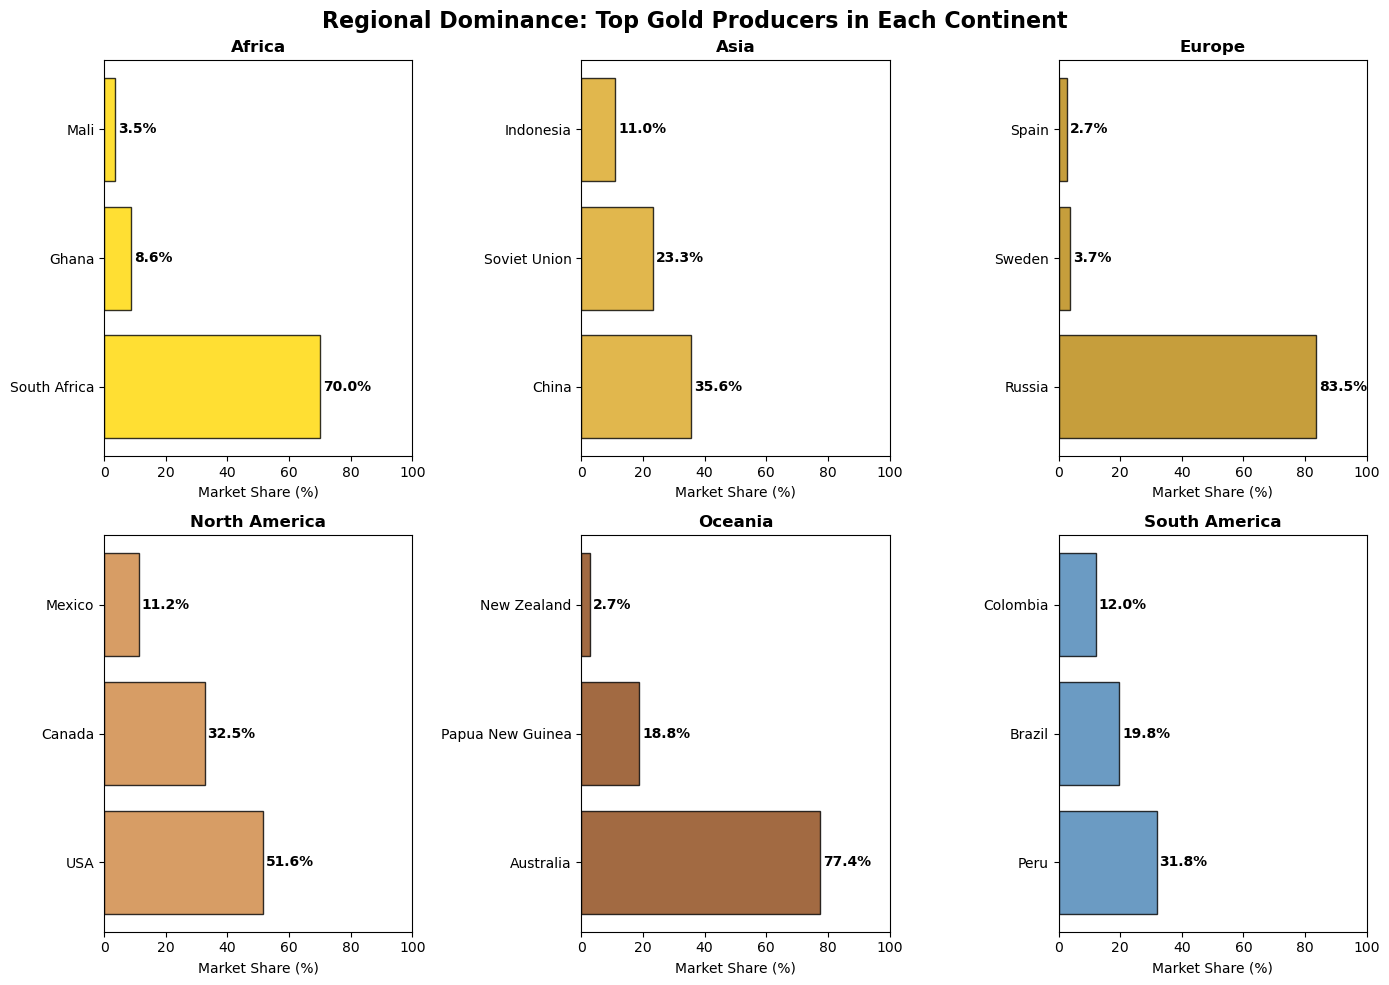


DOMINANCE LEVEL:
South Africa in Africa: Extremely Dominant (70.0%)
China in Asia: Moderately Dominant (35.6%)
Russia in Europe: Extremely Dominant (83.5%)
USA in North America: Very Dominant (51.6%)
Australia in Oceania: Extremely Dominant (77.4%)
Peru in South America: Moderately Dominant (31.8%)


In [23]:
# ANALYSIS Q8: Largest producers per region

# Calculate each country's share of their continent's production
continental_totals = gold_df_clean.groupby('Continent')['Production'].sum()
country_production = gold_df_clean.groupby(['Continent', 'Country'])['Production'].sum()

# Calculate market share within each continent
market_share = (country_production / continental_totals * 100).reset_index()
market_share.columns = ['Continent', 'Country', 'Market_Share']

# Get the dominant producer in each continent - FIXED APPROACH
dominant_producers = []
for continent in market_share['Continent'].unique():
    continent_data = market_share[market_share['Continent'] == continent]
    top_producer = continent_data.nlargest(1, 'Market_Share')
    dominant_producers.append(top_producer)

dominant_producers = pd.concat(dominant_producers)

print("DOMINANT GOLD PRODUCER IN EACH CONTINENT:")
print("=" * 50)
for _, row in dominant_producers.iterrows():
    print(f"{row['Continent']}: {row['Country']} ({row['Market_Share']:.1f}% of continental production)")

# Get top 3 producers in each continent - FIXED APPROACH
top_3_list = []
for continent in market_share['Continent'].unique():
    continent_data = market_share[market_share['Continent'] == continent]
    top_3 = continent_data.nlargest(3, 'Market_Share')
    top_3_list.append(top_3)

top_3_per_continent = pd.concat(top_3_list)

# Create visualization
plt.figure(figsize=(14, 10))
colors = ['#FFD700', '#DAA520', '#B8860B', '#CD853F', '#8B4513', '#4682B4']

for i, continent in enumerate(top_3_per_continent['Continent'].unique()):
    continent_data = top_3_per_continent[top_3_per_continent['Continent'] == continent]
    
    plt.subplot(2, 3, i+1)
    bars = plt.barh(continent_data['Country'], continent_data['Market_Share'], 
                   color=colors[i], alpha=0.8, edgecolor='black')
    
    plt.title(f'{continent}', fontweight='bold')
    plt.xlabel('Market Share (%)')
    plt.xlim(0, 100)
    
    # Add percentage labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', va='center', fontweight='bold')

plt.suptitle('Regional Dominance: Top Gold Producers in Each Continent', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Additional insight: Show how dominant the #1 producer is
print("\nDOMINANCE LEVEL:")
print("=" * 50)
for _, row in dominant_producers.iterrows():
    if row['Market_Share'] > 60:
        dominance = "Extremely Dominant"
    elif row['Market_Share'] > 40:
        dominance = "Very Dominant"
    elif row['Market_Share'] > 25:
        dominance = "Moderately Dominant"
    else:
        dominance = "Slightly Dominant"
    print(f"{row['Country']} in {row['Continent']}: {dominance} ({row['Market_Share']:.1f}%)")